In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
house_df_org = pd.read_csv('house_price.csv')
house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [97]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
house_df.shape

(1460, 81)

In [99]:
house_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [100]:
# null 처리

In [101]:
house_null_col = house_df.isnull().sum()
house_null_col

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [102]:
house_null_col[house_df.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [103]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
# label값의 정규분포화

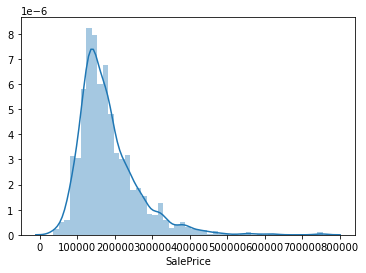

In [105]:
sns.distplot(house_df['SalePrice'])

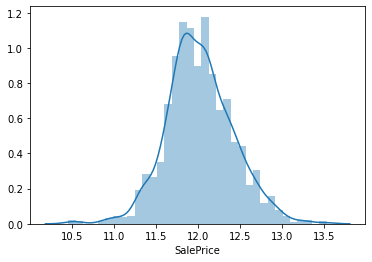

In [106]:
log_saleprice = np.log1p(house_df['SalePrice'])
sns.distplot(log_saleprice)

In [107]:
original_saleprice = house_df['SalePrice']
house_df['SalePrice'] = log_saleprice

In [108]:
### null값 처리..

In [109]:
house_null_col[house_df.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [110]:
# null값이 많은 칼럼 삭제, Id 칼럼 삭제

In [111]:
# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

In [112]:
# 나머지 null값은 칼럼평균으로 채운다..
house_df.fillna(house_df.mean(), inplace=True)

In [113]:
house_df.isnull().sum().sum()

520

In [114]:
# null값이 아직 남아있음 <- house_df.fillna(house_df.mean(), inplace=True)

null_columns_count = house_df.isnull().sum()
null_columns_count[house_df.isnull().sum() > 0]

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [115]:
house_df.dtypes   # object 는 fillna(house_df.mean())으로 채워지지 않는다.

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 75, dtype: object

In [116]:
# object => one_hot : pd.get_dummies()

In [120]:
house_df.shape

(1460, 75)

In [121]:
house_df_ohe = pd.get_dummies(house_df)
house_df_ohe.shape

(1460, 271)

In [122]:
house_df_ohe.isnull().sum().sum()

0

In [123]:
# 모델 생성, 학습, 평가

In [124]:
# error : y - y_hat
# mean_squared_error : sum[(y-y_hat)**2]/len(y)
# root_mean_squared_error : np.sqrt( sum[(y-y_hat)**2]/len(y) )

In [125]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = model.predict(x_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = house_df_ohe['SalePrice']
x = house_df_ohe.drop('SalePrice', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [127]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)

Lasso()

In [128]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 RMSE: 0.124
Lasso 로그 변환된 RMSE: 0.151


[0.1295392114446255, 0.12402324601317434, 0.15083247828002627]

In [129]:
lr_reg.coef_

array([-5.13412547e-04,  1.41158502e-04,  3.31136664e-06,  4.17477530e-02,
        3.76855690e-02,  1.58637521e-03,  9.92134510e-04,  1.34011829e-05,
        5.44870703e-05,  3.70379909e-05, -9.43025217e-06,  8.20947688e-05,
        6.14651133e-05,  4.72051328e-05,  4.93541109e-05,  1.58024486e-04,
        1.88992473e-02,  9.25837585e-04,  2.87140029e-02,  2.95296364e-02,
        1.51262053e-02, -7.50411738e-02,  2.41393401e-03,  3.35935483e-02,
       -3.34605295e-04,  1.51290537e-02,  1.30670897e-04,  7.53247930e-05,
        3.15259931e-05,  1.07200117e-04,  1.61454551e-04,  2.44083852e-04,
        1.30342462e-04,  2.33139748e-06,  2.26610800e-04, -2.05207577e-03,
       -3.22121495e-01,  1.18677624e-01,  9.23503555e-02,  7.15867369e-02,
        3.95067785e-02, -4.86782113e-02,  4.86782113e-02, -5.85644402e-03,
        4.96772302e-03,  9.53239389e-04, -6.45183879e-05, -2.34940595e-02,
        2.08980313e-02, -3.07658236e-02,  3.33618518e-02,  1.05289647e-01,
       -1.05289647e-01,  

In [130]:
ridge_reg.coef_

array([-6.22413751e-04, -3.37960884e-04,  2.00292759e-06,  4.79985023e-02,
        3.41291258e-02,  9.87307598e-04,  9.32536148e-04, -2.67496770e-06,
        1.12254652e-06,  2.51878326e-05, -6.64762504e-06,  1.96628234e-05,
        5.74725921e-05,  2.75140591e-05,  7.46772105e-05,  1.59663852e-04,
        3.75401905e-02,  8.65309754e-03,  4.54906705e-02,  3.52109755e-02,
        1.48635043e-02, -6.71634867e-02,  6.79991851e-03,  3.55432034e-02,
       -5.37743655e-04,  3.88924845e-02,  8.35984449e-05,  8.66796341e-05,
        3.42207321e-06,  1.23677350e-04,  1.81831264e-04,  2.64528972e-04,
       -5.00973175e-06, -8.98616087e-08,  9.09422473e-05, -3.02703048e-03,
       -2.83665644e-01,  1.08135883e-01,  8.07492242e-02,  6.42199386e-02,
        3.05605982e-02, -4.50233335e-02,  4.50233335e-02,  1.05686990e-02,
        3.35692276e-02, -6.18325283e-02,  1.76946017e-02, -5.41084145e-02,
        1.08039503e-02,  8.61251173e-03,  3.46919526e-02,  7.56362789e-02,
       -7.56362789e-02,  

In [131]:
ridge_reg.intercept_

13.60316433584207

In [132]:
x_train.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
632,20,85.000000,11900,7,5,1977,1977,209.0,822,0,...,0,0,0,1,0,0,0,1,0,0
1131,20,63.000000,10712,5,5,1991,1992,0.0,212,0,...,0,0,1,0,1,0,0,0,0,0
789,60,70.049958,12205,6,8,1966,2007,157.0,568,0,...,0,0,0,1,0,0,0,0,1,0


In [133]:
x_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=270)

In [134]:
pd.Series(lr_reg.coef_, index=x_train.columns)

MSSubClass              -0.000513
LotFrontage              0.000141
LotArea                  0.000003
OverallQual              0.041748
OverallCond              0.037686
                           ...   
SaleCondition_AdjLand    0.113027
SaleCondition_Alloca     0.000710
SaleCondition_Family    -0.061032
SaleCondition_Normal     0.002091
SaleCondition_Partial    0.016387
Length: 270, dtype: float64

In [135]:
# coef에 대한 시각화

In [136]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=x_train.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [137]:
get_top_bottom_coef(lr_reg)

(RoofMatl_Metal      0.769375
 RoofStyle_Shed      0.541711
 RoofMatl_WdShngl    0.390696
 Condition2_PosA     0.388480
 RoofMatl_Tar&Grv    0.385473
 BsmtCond_Po         0.362352
 RoofMatl_CompShg    0.354803
 Condition2_Feedr    0.293748
 RoofMatl_WdShake    0.273120
 Condition2_Norm     0.206431
 dtype: float64,
 Functional_Sev        -0.164430
 Functional_Maj2       -0.177580
 Heating_Grav          -0.191162
 LandSlope_Sev         -0.238341
 Exterior1st_BrkComm   -0.262811
 MSZoning_C (all)      -0.322121
 Electrical_Mix        -0.487735
 Condition2_PosN       -0.593629
 Condition2_RRAe       -0.606764
 RoofMatl_ClyTile      -2.173468
 dtype: float64)

In [138]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

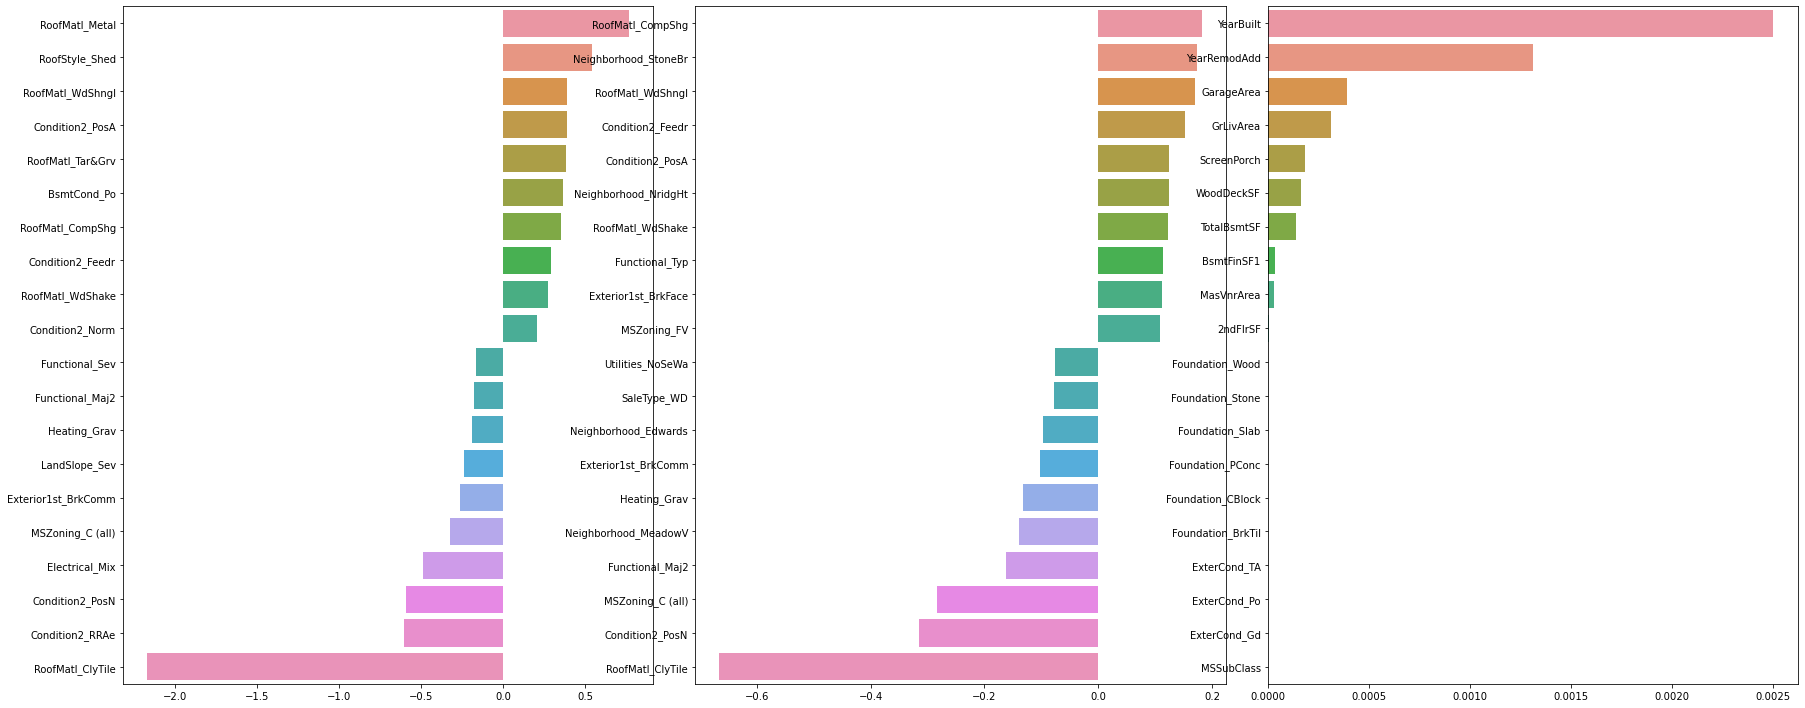

In [139]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [140]:
# cross_val_score : 평가를 정확하게

In [141]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, x_train, y_train,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

In [142]:
# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.172 0.181 0.133 0.225 0.134]
LinearRegression CV 평균 RMSE 값: 0.169

Ridge CV RMSE 값 리스트: [0.148 0.166 0.114 0.204 0.132]
Ridge CV 평균 RMSE 값: 0.153

Lasso CV RMSE 값 리스트: [0.189 0.229 0.16  0.281 0.18 ]
Lasso CV 평균 RMSE 값: 0.208


In [143]:
# 하이퍼라미터를 조절해서 모델을 최적화...

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(x_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_


In [144]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1522, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1536, 최적 alpha:{'alpha': 0.001}


In [145]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [146]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 RMSE: 0.122
Lasso 로그 변환된 RMSE: 0.113


[0.1295392114446255, 0.12187824586061156, 0.11285172851947985]

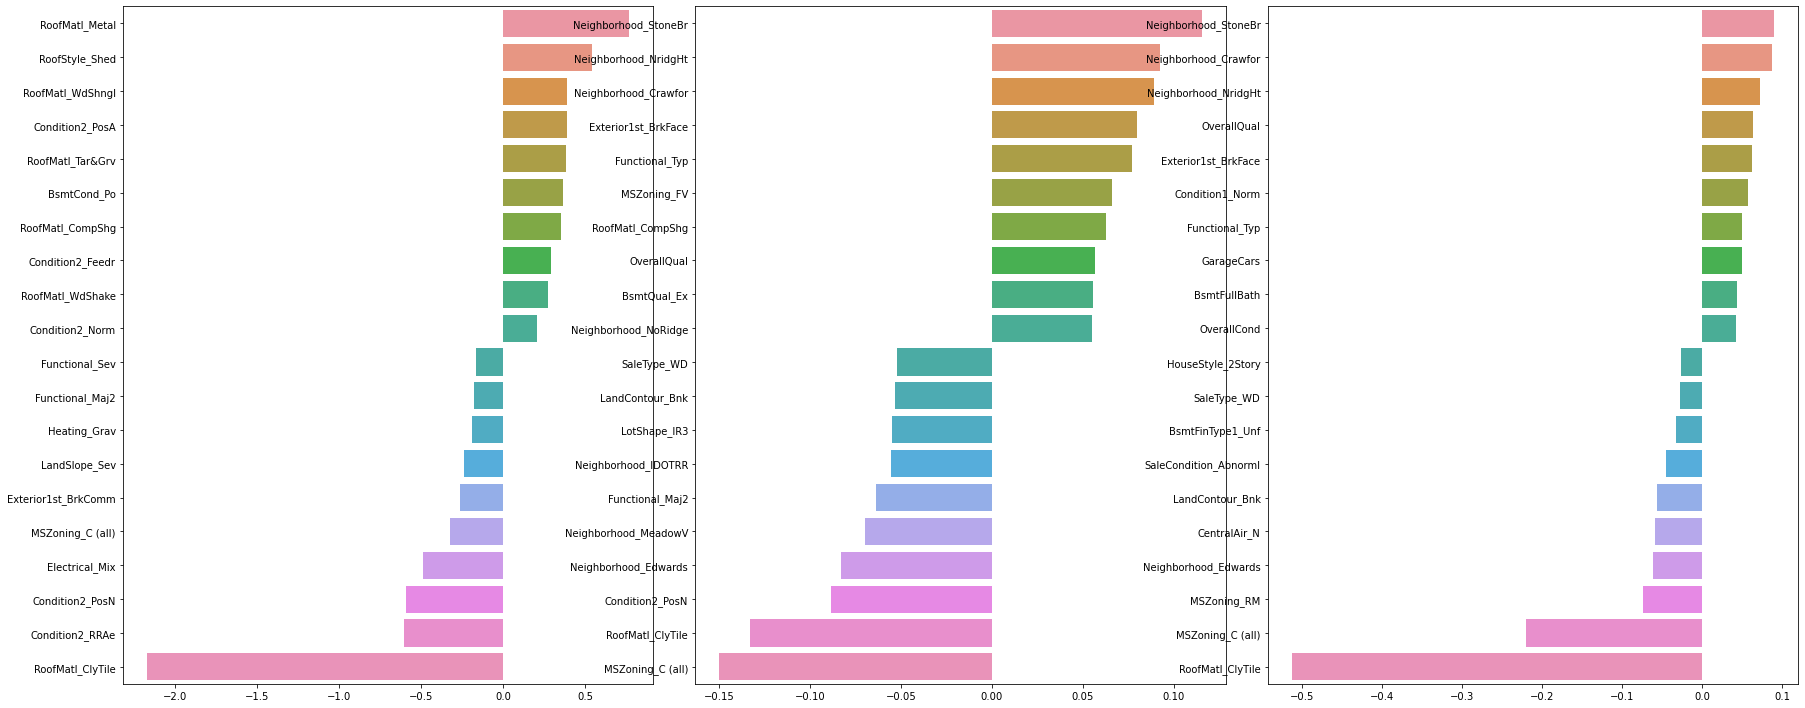

In [66]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [68]:
from sklearn.metrics import r2_score

preds = lr_reg.predict(x_test)
r2_score(y_test, preds)

0.8922321904788384

In [70]:
preds = ridge_reg.predict(x_test)
r2_score(y_test, preds)

0.9046020708243034

In [71]:
preds = lasso_reg.predict(x_test)
r2_score(y_test, preds)

0.9182094764107619

In [73]:
# feature의 skew검사.. 후 log처리..
# skew(왜도) : 데이터 분포의 치우침 정도.. 1 이상이면 데이터의 치우침정도가 크다..

In [154]:
house_df1 = house_df.copy()

In [155]:
from scipy.stats import skew

features_index = house_df1.dtypes[house_df1.dtypes != 'object'].index
skew_features = house_df1[features_index].apply(lambda x: skew(x))
skew_features

MSSubClass        1.406210
LotFrontage       2.382499
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.673661
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.667488
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
SalePrice         0.121222
d

In [156]:
# skew,가 1보다 큰 칼럼만 추출..

skew_features_top = skew_features[skew_features > 1]
skew_features_top

MSSubClass        1.406210
LotFrontage       2.382499
LotArea          12.195142
MasVnrArea        2.673661
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
TotalBsmtSF       1.522688
1stFlrSF          1.375342
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64

In [157]:
skew_features_top.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [158]:
# skew가 큰 칼럼들을 log처리..

house_df1[skew_features_top.index] = np.log1p(house_df1[skew_features_top.index])

In [159]:
house_df1_ohe = pd.get_dummies(house_df1)

In [164]:
y = house_df1_ohe['SalePrice']
x = house_df1_ohe.drop('SalePrice',axis=1)
x_train, xtest, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156)

In [165]:
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1321, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1308, 최적 alpha:{'alpha': 0.001}


In [166]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(x_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [167]:
np.sqrt(mean_squared_error(y_test, lr_reg.predict(x_test)))

1917.5989181730092

In [163]:
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 1917.599
Ridge 로그 변환된 RMSE: 1585.765
Lasso 로그 변환된 RMSE: 1642.947


[1917.5989181730092, 1585.7652152899586, 1642.9474839382797]